Automatically created module for IPython interactive environment
58


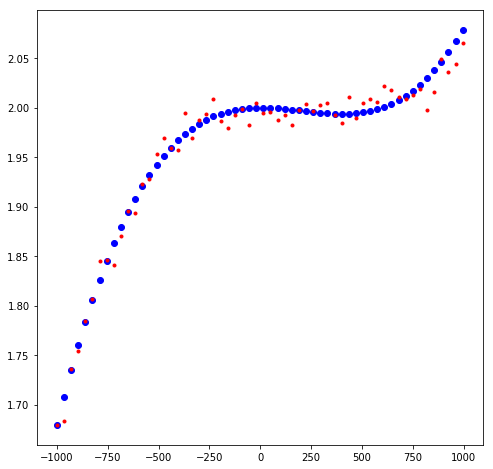

In [6]:
# CODE DATAS

print(__doc__)
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import math

A=0.02
B=-12
C=51
D=2*math.pow(10,8)


X=np.arange(-1000,1000,35)
SIZE=np.size(X)
print(SIZE)
Y=(A*X**3+B*X**2+C*X+D)*0.00000001
Bruit=Y + np.random.randint(0,15, size=(1,SIZE))[0]*0.005*(np.random.rand(1,SIZE)-0.5)[0]


fig = plt.figure(1,figsize=(8,8))
plt.plot(X,Y,"bo")# model lineaire
plt.plot(X,Bruit,"r.")# model lineaire bruité
plt.show()

In [2]:
# MODEL SVR

svr_lin = SVR(kernel='linear', C=100, gamma='scale')
svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.001, coef0=2)
X_=X.reshape(-1, 1)

#y_rbf = svr_rbf.fit(X_ , Y).predict(X_)
#y_lin = svr_lin.fit(X_, Y).predict(X_)
#y_poly = svr_poly.fit(X_, Y).predict(X_)

eccart carré moyen : 0.003500615374733936
eccart carré moyen : 6.847129083752741e-07


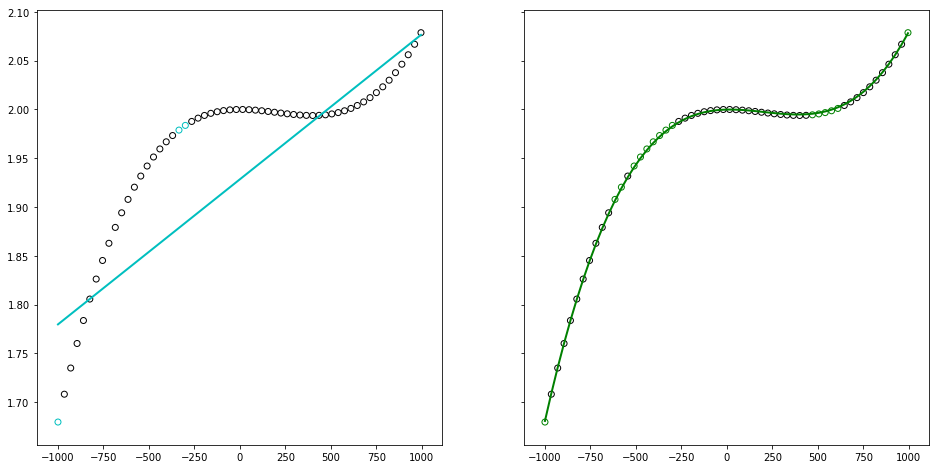

In [3]:
# DRAW LIN et NON LIN

svrs = [svr_lin,svr_poly]
model_color = ['c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
for index, svr in enumerate(svrs):
    PREDICT=svr.fit(X_, Y).predict(X_)
    axes[index].plot(X_, PREDICT, color=model_color[index], lw=2)
    # on affiche les points supports du SVM
    axes[index].scatter(X_[svr.support_], Y[svr.support_], facecolor="none",edgecolor=model_color[index])
    # les autres points qui ne sont pas les supports (d'ou le diff)
    axes[index].scatter(X_[np.setdiff1d(np.arange(len(X)), svr.support_)],Y[np.setdiff1d(np.arange(len(X)),
        svr.support_)],facecolor="none", edgecolor="k")
    print("eccart carré moyen : {}".format(np.square(Y-PREDICT).mean()))

plt.show()

eccart carré moyen : 0.0032364530284945616
eccart carré moyen : 3.2041407166403025e-06


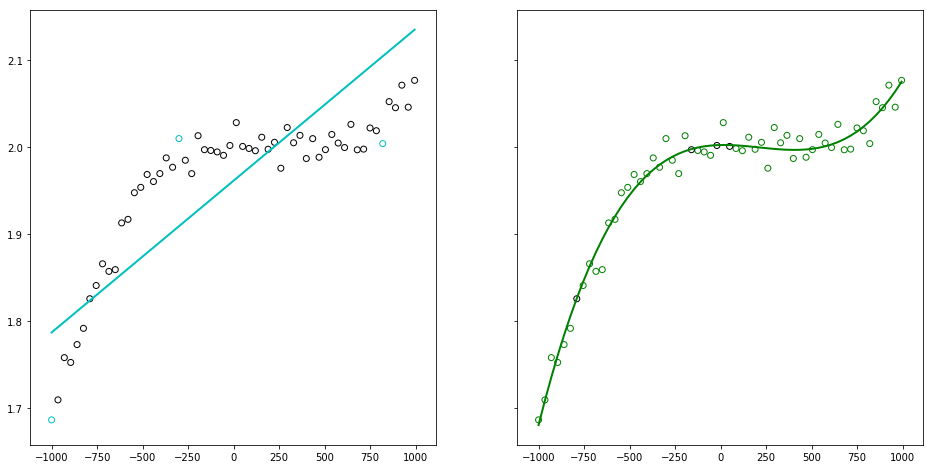

In [4]:
# DRAW LIN et NON LIN + BRUIT
svrs = [ svr_lin,svr_poly]
model_color = ['c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)
for index, svr in enumerate(svrs):
    PREDICT=svr.fit(X_, Bruit).predict(X_)
    axes[index].plot(X_, PREDICT, color=model_color[index], lw=2)
    # on affiche les points supports du SVM
    axes[index].scatter(X_[svr.support_], Bruit[svr.support_], facecolor="none",edgecolor=model_color[index])
    # les autres points qui ne sont pas les supports (d'ou le diff)
    axes[index].scatter(X_[np.setdiff1d(np.arange(len(X)), svr.support_)],Bruit[np.setdiff1d(np.arange(len(X)),
        svr.support_)],facecolor="none", edgecolor="k")
    print("eccart carré moyen : {}".format(np.square(Y-PREDICT).mean()))


plt.show()

eccart carré moyen : 0.0032364530284945616
eccart carré moyen : 0.002954915450864114


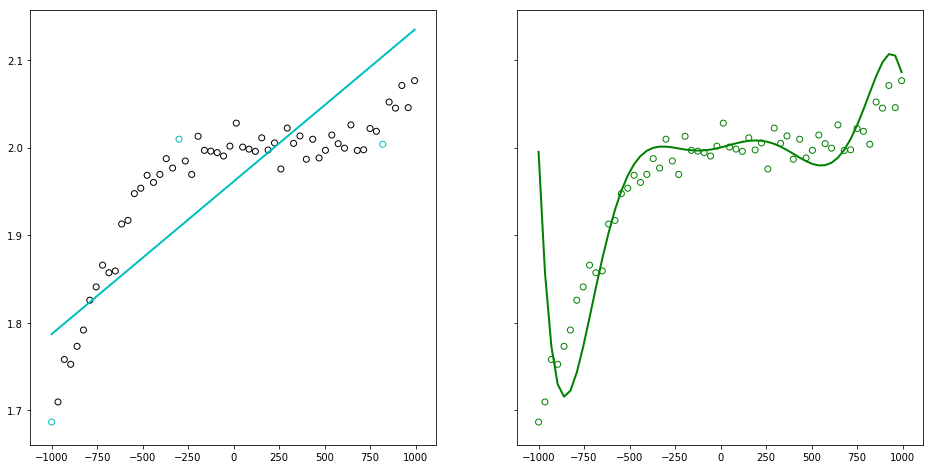

In [5]:
# AVEC DEG 7
svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=7, epsilon=.001, coef0=2)

svrs = [ svr_lin,svr_poly]
model_color = ['c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)
for index, svr in enumerate(svrs):
    PREDICT=svr.fit(X_, Bruit).predict(X_)
    axes[index].plot(X_, PREDICT, color=model_color[index], lw=2)
    # on affiche les points supports du SVM
    axes[index].scatter(X_[svr.support_], Bruit[svr.support_], facecolor="none",edgecolor=model_color[index])
    # les autres points qui ne sont pas les supports (d'ou le diff)
    axes[index].scatter(X_[np.setdiff1d(np.arange(len(X)), svr.support_)],Bruit[np.setdiff1d(np.arange(len(X)),
        svr.support_)],facecolor="none", edgecolor="k")
    print("eccart carré moyen : {}".format(np.square(Y-PREDICT).mean()))


plt.show()